In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
df <- read_csv('../../data/fig2.feature_degree/DrD.csv')

Parsed with column specification:
cols(
  id_a = col_double(),
  id_b = col_double(),
  jaccard_coefficient = col_double(),
  preferential_attachment = col_double(),
  resource_allocation_index = col_double(),
  edge = col_logical()
)


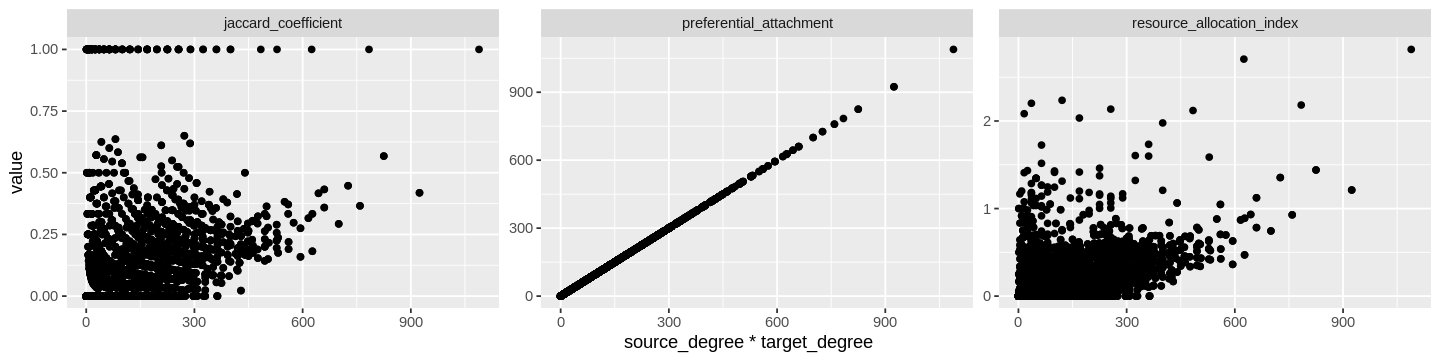

In [6]:
options(repr.plot.width=12, repr.plot.height=3)

df %>%
group_by(id_a) %>%
mutate(source_degree = sum(edge)) %>%
ungroup() %>%
group_by(id_b) %>%
mutate(target_degree = sum(edge)) %>%
ungroup() %>%
gather('feature', 'value', -id_a, -id_b, -edge, -source_degree, -target_degree) %>%
ggplot(aes(x = source_degree * target_degree, y = value)) +
geom_point() +
facet_wrap(vars(feature), scales = 'free')